In [1]:
from numpy.core.numeric import argwhere

from data.plotting_utils import plot_polar_with_stats

%cd ..

Could not import fluidsynth. AUDIO rendering will not work.
Holoviews not installed. Please install holoviews to be able to generate heatmaps.


/Users/bezha/PycharmProjects/TripleStreams


In [2]:
import yaml
import numpy as np
import os
from data import get_flexcontrol_triplestream_dataset
from data.src.feature_extractors import rhythm_density_sync_score, intra_stream_exclusiveness
import matplotlib.pyplot as plt
# suppress matplotlib warnings
import logging
import matplotlib
logging.getLogger('matplotlib.font_manager').setLevel(logging.WARNING)

In [11]:
# config = yaml.safe_load(open('helpers/configs/FlexControlTripleStreams_0.5.yaml', 'r'))

config = {
    'dataset_root_path': 'data/triple_streams/model_ready/AccentAt0.75/',
    'augment_with_no_inputs': True,

    'dataset_files': [
        '01_candombe_four_voices.pkl.bz2',
        '02_elbg_both_flattened_left_right.pkl.bz2',
        '03_groove_midi_crash_hhclosed_hhopen_ride.pkl.bz2',
        '04_groove_midi_hh_kick_snare_toms.pkl.bz2',
        '05_groove_midi_hi_lo_mid_ride.pkl.bz2',
        '06_lmd_bass_brass_drum_percussion.pkl.bz2',
        '07_lmd_bass_brass_drum_percussive.pkl.bz2',
        '08_lmd_bass_brass_guitar_percussion.pkl.bz2',
        '09_lmd_bass_brass_guitar_percussive.pkl.bz2',
        '10_lmd_bass_brass_guitar_piano.pkl.bz2',
        '11_lmd_bass_brass_percussion_percussive.pkl.bz2',
        '12_lmd_bass_brass_percussion_piano.pkl.bz2',
        '13_lmd_bass_brass_percussive_piano.pkl.bz2',
        '14_lmd_bass_drum_guitar_percussion.pkl.bz2',
        '15_lmd_bass_drum_guitar_percussive.pkl.bz2',
        '16_lmd_bass_drum_percussion_percussive.pkl.bz2',
        '17_lmd_bass_drum_percussion_piano.pkl.bz2',
        '18_lmd_bass_drum_percussive_piano.pkl.bz2',
        '19_lmd_bass_guitar_percussion_percussive.pkl.bz2',
        '20_lmd_bass_guitar_percussion_piano.pkl.bz2',
        '21_lmd_bass_guitar_percussive_piano.pkl.bz2',
        '22_lmd_bass_percussion_percussive_piano.pkl.bz2',
        '23_lmd_brass_drum_guitar_percussion.pkl.bz2',
        '24_lmd_brass_drum_guitar_percussive.pkl.bz2',
        '25_lmd_brass_drum_guitar_piano.pkl.bz2',
        '26_lmd_brass_drum_percussion_percussive.pkl.bz2',
        '27_lmd_brass_drum_percussion_piano.pkl.bz2',
        '28_lmd_brass_drum_percussive_piano.pkl.bz2',
        '29_lmd_brass_guitar_percussion_percussive.pkl.bz2',
        '30_lmd_brass_guitar_percussion_piano.pkl.bz2',
        '31_lmd_brass_guitar_percussive_piano.pkl.bz2',
        '32_lmd_brass_percussion_percussive_piano.pkl.bz2',
        '33_lmd_drum_guitar_percussion_percussive.pkl.bz2',
        '34_lmd_drum_guitar_percussion_piano.pkl.bz2',
        '35_lmd_drum_guitar_percussive_piano.pkl.bz2',
        '36_lmd_drum_percussion_percussive_piano.pkl.bz2',
        '37_lmd_guitar_percussion_percussive_piano.pkl.bz2',
        '38_ttd_both-is-and_both_flattened_left_right.pkl.bz2',
        '39_ttd_both-is-or_both_flattened_left_right.pkl.bz2'

    ],

    'max_len': 32,

    'n_encoding_control_tokens': [None, None],  # No need to tokenize
    'encoding_control_modes': ['self_attention', 'self_attention'],  # Strategic: first prepended, second added
    'encoding_control_keys':
        [
            "Center of Mass | Input + Output | Magnitude",
            "Center of Mass | Input + Output | Angle"
        ],
    
    # Decoding Controls (converted from legacy decoding_control1/2/3)
    'n_decoding_control_tokens': [33, None, 2,  2, 2],  # No need to tokenize these controls
    'decoding_control_modes': ['self_attention', 'self_attention', 'self_attention', 'self_attention', 'self_attention'],  # All prepended (legacy behavior)
    'decoding_control_keys':
        [
            "N Active Steps | Output",
            "Intra Stream Exclusiveness",
            "Stream 1 | Muted",
            "Stream 2 | Muted",
            "Stream 3 | Muted",
        ]

}

is_testing = False

dataset = get_flexcontrol_triplestream_dataset(
        config=config,
        subset_tag="train",
        use_cached=True,
        downsampled_size=2000 if is_testing else None,
        print_logs=False
    )



In [12]:
import torch
input_grooves = dataset[:][0]
output_streams = dataset[:][1]
input_output_com_mag = dataset[:][2][:, 0]
input_output_com_ang = dataset[:][2][:, 1]
output_n_active_steps = dataset[:][3][:, 0]
intra_stream_exclusiveness = dataset[:][3][:, 1]
stream_1_mutes = dataset[:][3][:, 2]
stream_2_mutes = dataset[:][3][:, 3]
stream_3_mutes = dataset[:][3][:, 4]

/Users/bezha/PycharmProjects/TripleStreams/data/plotting_utils.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', bbox_to_anchor=(0.1, 1.1))


(<Figure size 600x600 with 1 Axes>,
 <PolarAxes: title={'center': 'Polar Coordinates\nCenter of Mass Analysis'}>,
 array([      0,       1,       2, ..., 2699653, 2699654, 2699655]))

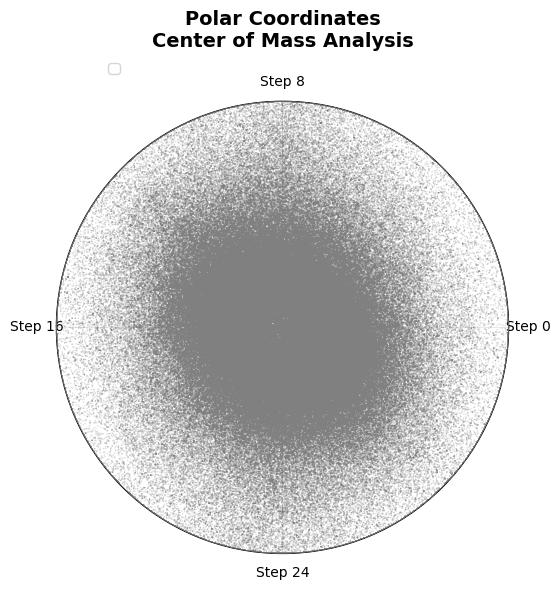

In [13]:
# Plot Center of Mass Distributions
from data.plotting_utils import *
plot_polar_single(
    radius=input_output_com_mag,
    angle=input_output_com_ang,
    figsize=(6, 6),
    color="grey",
    point_size=1,
    point_alpha=0.05
)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x567b38100>


(<Figure size 800x800 with 2 Axes>,
 <PolarAxes: title={'center': 'Polar Coordinate Density\nCenter of Mass Distribution'}>,
 array([[ 7947.,   480.,  1308., ...,   450.,   294., 11030.],
        [  583.,   726.,  1062., ...,   408.,   414.,  6060.],
        [ 1026.,   654.,   984., ...,   378.,   342.,  5880.],
        ...,
        [ 1350.,   883.,  1213., ...,   468.,   414.,  9350.],
        [ 2244.,   654.,  1194., ...,   366.,   492., 14240.],
        [ 7947.,   480.,  1308., ...,   450.,   294., 11030.]]))

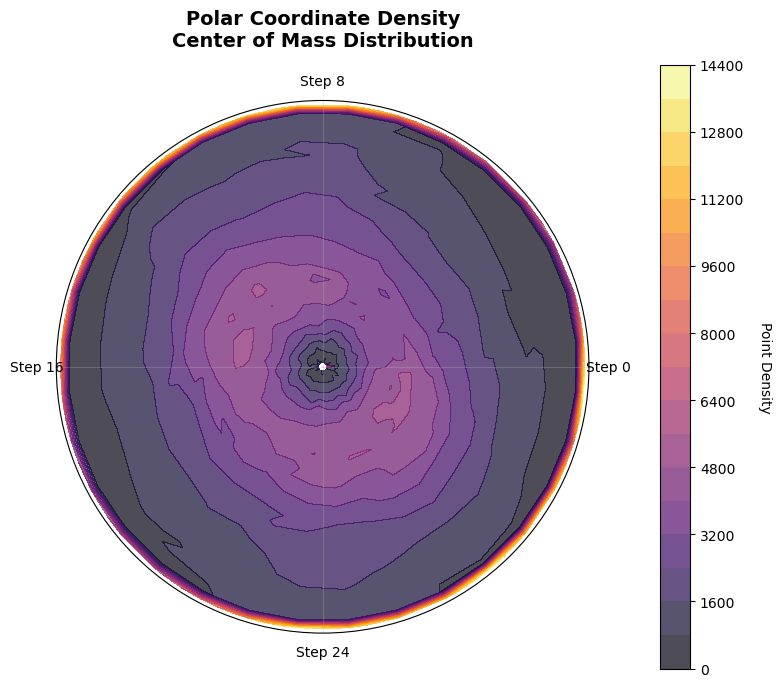

In [14]:
plot_polar_density(
    radius=input_output_com_mag,
    angle=input_output_com_ang,
    figsize=(8, 8),
    bins=32,
    radial_bins=32,
    cmap="inferno",
    nonlinear_scale="linear"

)

In [15]:
# Plot histogram of

def plot_polar_scatter_intensity(radius, angle, intensity, draw_n_points=None, figsize=(10, 10),
                                 cmap='viridis', point_size=10, point_alpha=0.7, colorbar_label="Intensity"):
    """
    Plot polar coordinates with color-coded intensity values.

    Args:
        radius: array-like, radius values (0-1)
        angle: array-like, angle values (0-1, representing 0 to 2π)
        intensity: array-like, intensity/color values for each point
        draw_n_points: int or None, if provided randomly sample N points to draw, else draw all
        figsize: tuple, figure size
        cmap: str, colormap for intensity visualization
        point_size: int, size of scatter points
        point_alpha: float, alpha/transparency for points
        colorbar_label: str, label for the colorbar

    Returns:
        fig, ax: matplotlib figure and axis objects
        selected_indices: array of indices that were plotted
        scatter: matplotlib scatter object for further customization
    """

    # Convert to numpy arrays for easier indexing
    radius = np.array(radius)
    angle = np.array(angle)
    intensity = np.array(intensity)

    # Determine which points to draw
    total_points = len(radius)
    if draw_n_points is not None and draw_n_points < total_points:
        # Randomly sample indices
        selected_indices = np.random.choice(total_points, size=draw_n_points, replace=False)
        selected_indices = np.sort(selected_indices)  # Sort for consistent ordering
    else:
        # Use all points
        selected_indices = np.arange(total_points)

    # Select the subset of data
    plot_radius = radius[selected_indices]
    plot_angle = angle[selected_indices]
    plot_intensity = intensity[selected_indices]

    # Convert normalized angles (0-1) to radians (0-2π)
    plot_angle_rad = plot_angle * 2 * np.pi

    # Create figure and axis with white background
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection='polar'),
                          facecolor='white')
    ax.set_facecolor('white')

    # Plot points with intensity-based coloring
    scatter = ax.scatter(plot_angle_rad, plot_radius, c=plot_intensity,
                        s=point_size, alpha=point_alpha, cmap=cmap,
                        edgecolors='none', zorder=3)

    # Customize the plot
    ax.set_ylim(0, 1)
    ax.set_title("Polar Coordinates with Intensity\nCenter of Mass Analysis",
                fontsize=14, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3)
    ax.set_theta_zero_location('E')
    ax.set_theta_direction(1)

    # Add angle labels (in terms of timesteps)
    angle_positions = [step/32 * 2 * np.pi for step in [0, 8, 16, 24]]
    angle_labels = [f'Step {step}' for step in [0, 8, 16, 24]]
    ax.set_thetagrids(np.degrees(angle_positions), angle_labels)

    # Remove radial labels
    ax.set_yticks([])
    ax.set_yticklabels([])

    # Add colorbar for intensity
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.8, pad=0.1)
    cbar.set_label(colorbar_label, rotation=270, labelpad=20)

    plt.tight_layout()
    return fig, ax, selected_indices, scatter


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x48153cd00>


(<Figure size 600x600 with 2 Axes>,
 <PolarAxes: title={'center': 'Polar Coordinates with Intensity\nCenter of Mass Analysis'}>,
 array([      0,       1,       2, ..., 2699653, 2699654, 2699655]),
 <matplotlib.collections.PathCollection at 0x30ab08250>)

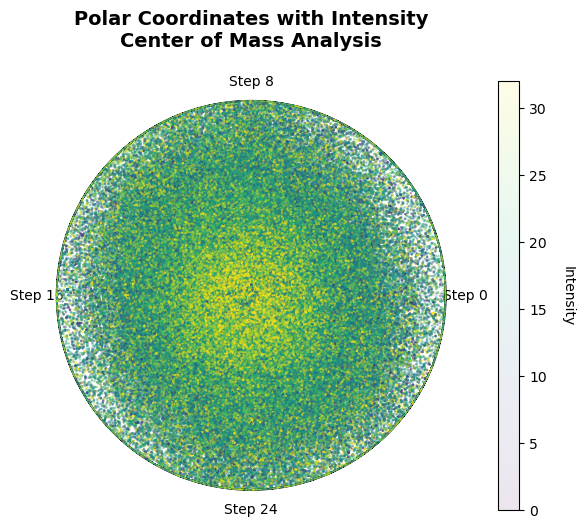

In [16]:
plot_polar_scatter_intensity(
    radius=input_output_com_mag,
    angle=input_output_com_ang,
    intensity=output_n_active_steps,
    figsize=(6, 6),
    point_size=3,
    point_alpha=0.1,
)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x3a6a69fa0>


(<Figure size 600x600 with 2 Axes>,
 <PolarAxes: title={'center': 'Polar Coordinates with Intensity\nCenter of Mass Analysis'}>,
 array([      0,       1,       2, ..., 2699653, 2699654, 2699655]),
 <matplotlib.collections.PathCollection at 0x3a5adf820>)

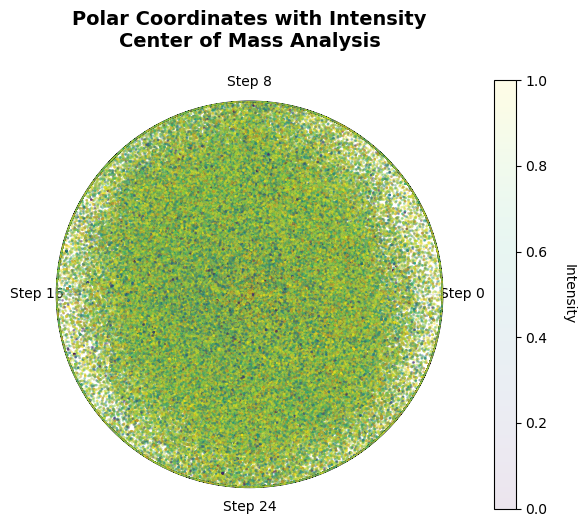

In [17]:
plot_polar_scatter_intensity(
    radius=input_output_com_mag,
    angle=input_output_com_ang,
    intensity=intra_stream_exclusiveness,
    figsize=(6, 6),
    point_size=3,
    point_alpha=0.1
)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x3698aa6a0>


(<Figure size 600x600 with 2 Axes>,
 <PolarAxes: title={'center': 'Polar Coordinates with Intensity\nCenter of Mass Analysis'}>,
 array([      0,       1,       2, ..., 2699653, 2699654, 2699655]),
 <matplotlib.collections.PathCollection at 0x36c59ad00>)

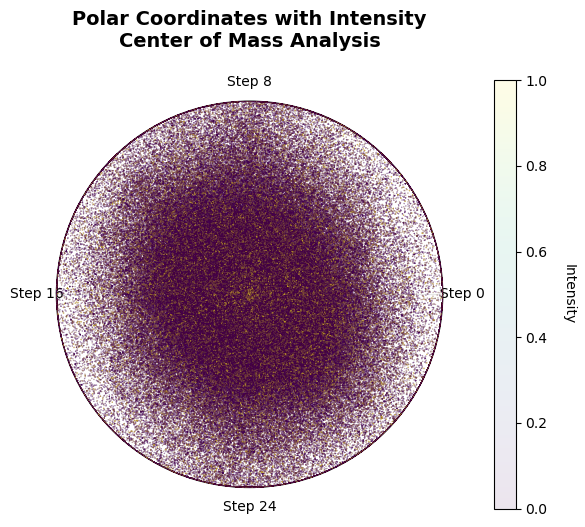

In [18]:
plot_polar_scatter_intensity(
    radius=input_output_com_mag,
    angle=input_output_com_ang,
    intensity=stream_1_mutes,
    figsize=(6, 6),
    point_size=1,
    point_alpha=0.1,
)